# Using different scores, the groups and clusters should be relatively similar?
- maybe not the individual clusters, but who knows 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
from matplotlib_venn import venn2, venn3
from tqdm import tnrange, tqdm_notebook

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/'

In [3]:
bed1_file = os.path.join(input_dir, 'RPS2-STAMP_possorted_genome_bam_MD-RPS2_escore_barcodes_with_flags_g1_all.txt.fx.bed')
bed2_file = os.path.join(input_dir, 'RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags_g1_all.txt.fx.bed')

In [4]:
COLORS = sns.color_palette("hls", 8)
bed_names = ['chrom', 'start', 'end', 'name', 'score', 'strand']

In [5]:
def pos2string(row):
    return '{}:{}-{}:{}'.format(row['chrom'], row['start'], row['end'], row['strand'])

bed1 = pd.read_csv(bed1_file, names=bed_names, sep='\t')
bed1['pos'] = bed1.apply(pos2string, axis=1)

bed2 = pd.read_csv(bed2_file, names=bed_names, sep='\t')
bed2['pos'] = bed2.apply(pos2string, axis=1)

bed1.head()

,chrom,start,end,name,score,strand,pos
0,chr1,720211,720212,0.950990,"1,6",+,chr1:720211-720212:+
1,chr1,850050,850051,0.851458,"1,17",+,chr1:850050-850051:+
2,chr1,879357,879358,0.425590,"1,86",+,chr1:879357-879358:+
3,chr1,879459,879460,0.317989,"1,115",+,chr1:879459-879460:+
4,chr1,879538,879539,0.642612,"1,45",+,chr1:879538-879539:+


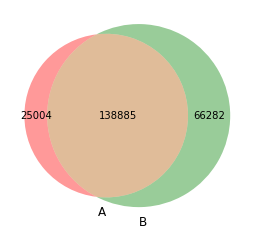

In [6]:
venn2([set(bed1['pos']), set(bed2['pos'])])

In [7]:
all_epkm_files = sorted(glob.glob(os.path.join(input_dir, 'RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags*.txt.fx.bed')))
all_epkm_files

['/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags_cluster0.txt.fx.bed',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags_cluster1.txt.fx.bed',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags_cluster2.txt.fx.bed',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags_cluster3.txt.fx.bed',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_c

[Errno 2] File b'/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_escore_barcodes_with_flags_cluster4.txt.fx.bed' does not exist: b'/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_escore_barcodes_with_flags_cluster4.txt.fx.bed' /home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RPS2-STAMP_possorted_genome_bam_MD-RPS2_EPKM_barcodes_with_flags_cluster4.txt.fx.bed


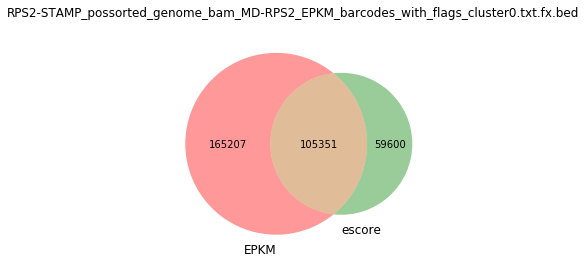

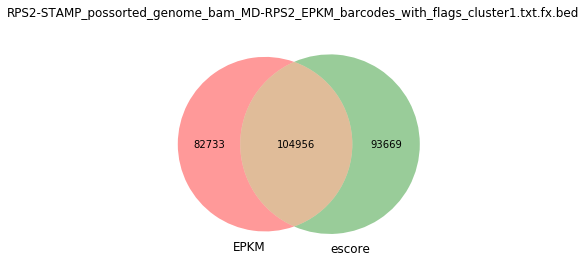

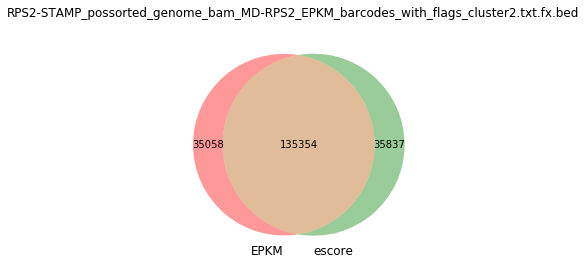

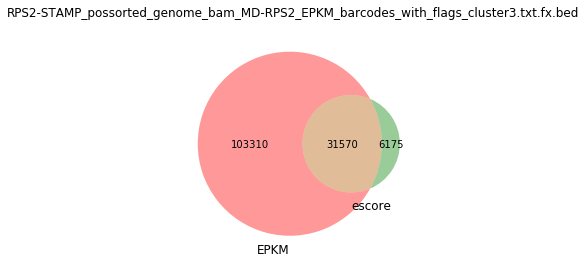

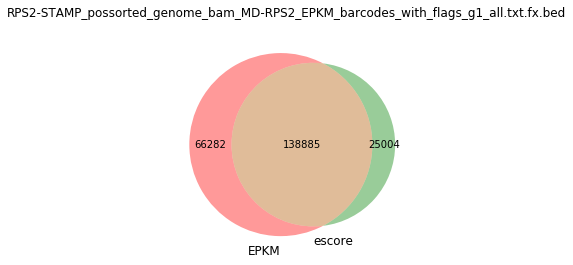

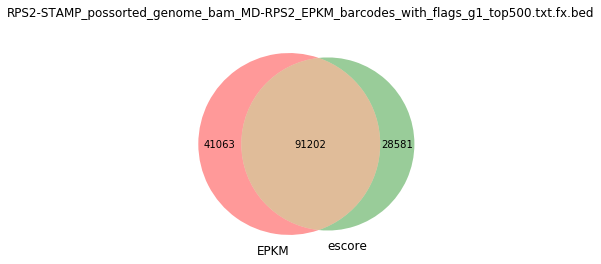

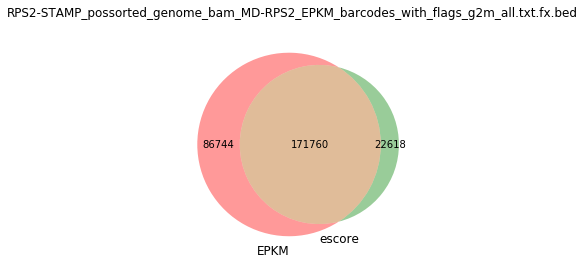

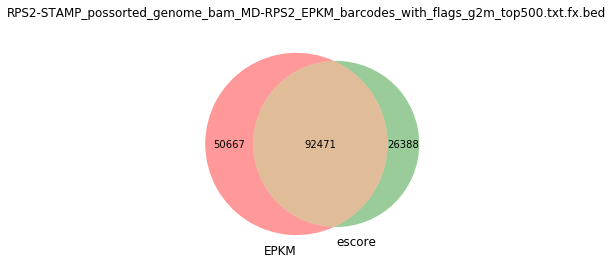

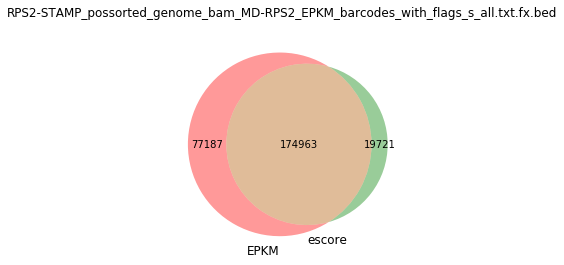

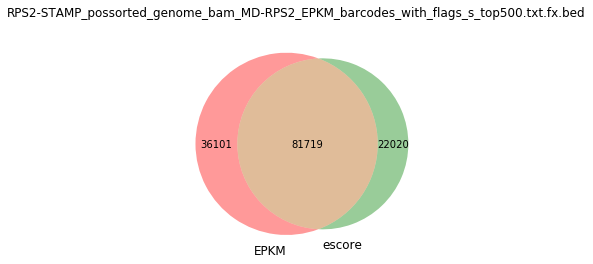

In [12]:
progress = tnrange(len(all_epkm_files))
for bed1_file in all_epkm_files:
    bed2_file = bed1_file.replace('RPS2_EPKM_barcodes_with_flags','RPS2_escore_barcodes_with_flags')
    try:
        bed1 = pd.read_csv(bed1_file, names=bed_names, sep='\t')
        bed1['pos'] = bed1.apply(pos2string, axis=1)

        bed2 = pd.read_csv(bed2_file, names=bed_names, sep='\t')
        bed2['pos'] = bed2.apply(pos2string, axis=1)
        fig, ax = plt.subplots()
        venn2([set(bed1['pos']), set(bed2['pos'])], ['EPKM', 'escore'], ax=ax)
        fig.suptitle(os.path.basename(bed1_file))
    except Exception as e:
        print(e, bed1_file) # I expect there to be an error with comparing cluster4, since cluster4 doesn't exist for escore.
    progress.update(1)